#  <span style = "color : red"> Exploratory Data Analysis</span>

##  <span style = "color : lightgreen"> Importing Libraries</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

##  <span style = "color : lightgreen"> Data Reading</span>

In [2]:
df=pd.read_csv("HR_Analytics.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##  <span style = "color : lightgreen"> Checking Missing Data</span>

In [6]:
if df.isnull().sum().sum() == 0:
    print('CHECK: No missing data \n')
else:
    print('CHECK: Missing data found \n')
print(df.isnull().sum())

CHECK: No missing data 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentR

##  <span style = "color : lightgreen"> Replacing 'Yes' by '1' and 'No' by '0'</span>

In [7]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

#  <span style = "color : red"> Data Related Some Plots</span>

##  <span style = "color : lightgreen"> Bar Diagram</span>

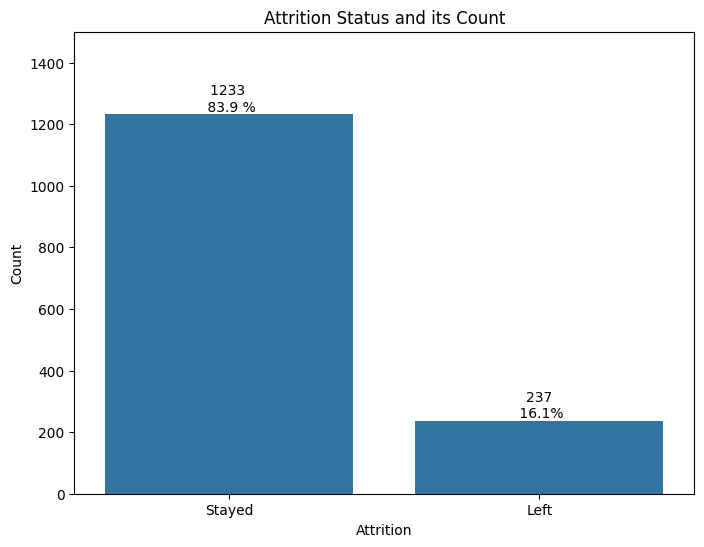

In [8]:
plt.figure(figsize=(8, 6)) 
sns.countplot(x='Attrition', data=df)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks([0,1], ['Stayed', 'Left'])
plt.annotate(f'{df["Attrition"].value_counts()[0]} \n {round(df["Attrition"].value_counts()[0]/len(df)*100,1)} %', (0, df["Attrition"].value_counts()[0]), ha='center', va='bottom')
plt.annotate(f'{df["Attrition"].value_counts()[1]}\n {round(df["Attrition"].value_counts()[1]/len(df)*100,1)}%', (1, df["Attrition"].value_counts()[1]), ha='center', va='bottom')
plt.title('Attrition Status and its Count')
plt.xlim(-0.5, 1.5)  
plt.ylim(0,1500)  

plt.show()


##  <span style = "color : lightgreen"> Histogram for each Numeric Feature in the Dataset</span>

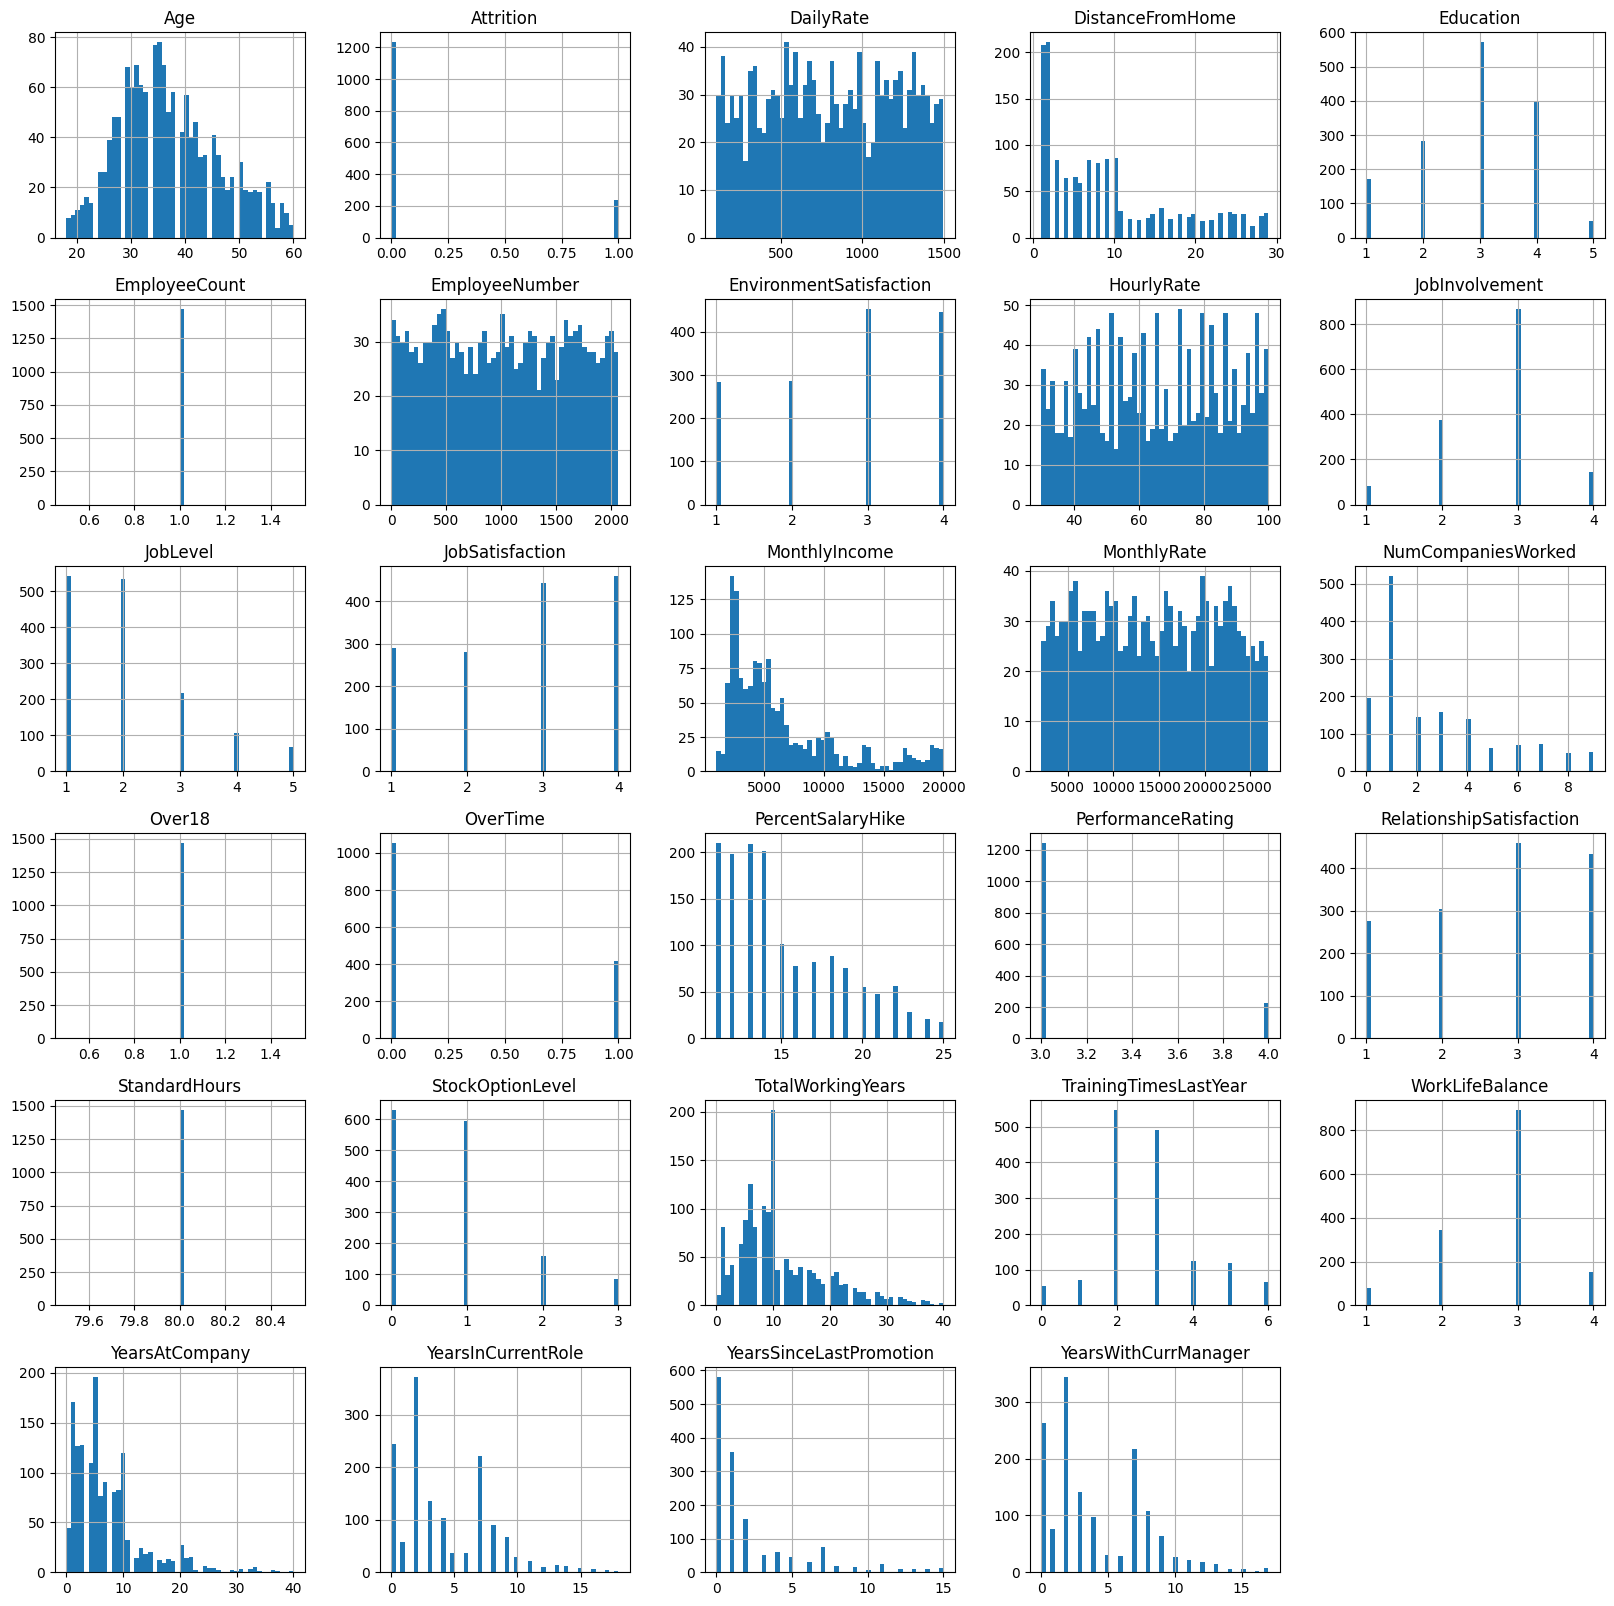

In [9]:
df.hist(figsize=(20,20), bins=50)
plt.show()

##  <span style = "color : lightgreen"> Dropping Columns </span>

In [10]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis="columns", inplace=True)

##  <span style = "color : lightgreen"> Updated Dataset </span>

In [11]:
print(df.shape)
df

(1470, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [12]:
left_df = df[df['Attrition'] == 1]
stayed_df = df[df['Attrition'] == 0]
print(f'Total Employees: {len(df)}\n')
print(f'Number of employees who left: {df["Attrition"].value_counts()[1]}')
print(f'% of employees who left: {round(df["Attrition"].value_counts()[1]/len(df)*100,2)}%\n')
print(f'Number of employees who stayed: {df["Attrition"].value_counts()[0]}')
print(f'% of employees who stayed: {round(df["Attrition"].value_counts()[0]/len(df)*100,2)}%')

Total Employees: 1470

Number of employees who left: 237
% of employees who left: 16.12%

Number of employees who stayed: 1233
% of employees who stayed: 83.88%


<Axes: xlabel='DistanceFromHome', ylabel='Count'>

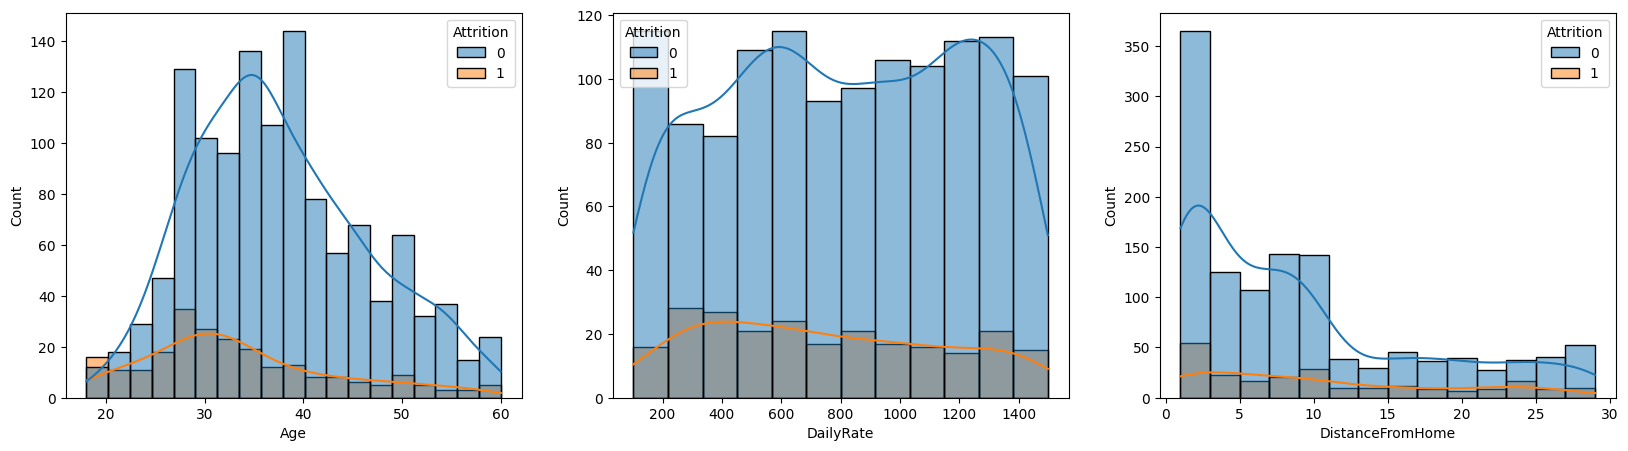

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(df, x='Age', hue='Attrition', kde=True, ax=ax[0])
sns.histplot(df, x='DailyRate', hue='Attrition', kde=True, ax=ax[1])
sns.histplot(df, x='DistanceFromHome', hue='Attrition', kde=True, ax=ax[2])

##  <span style = "color : lightgreen"> Correlation Heatmap</span>

<Axes: >

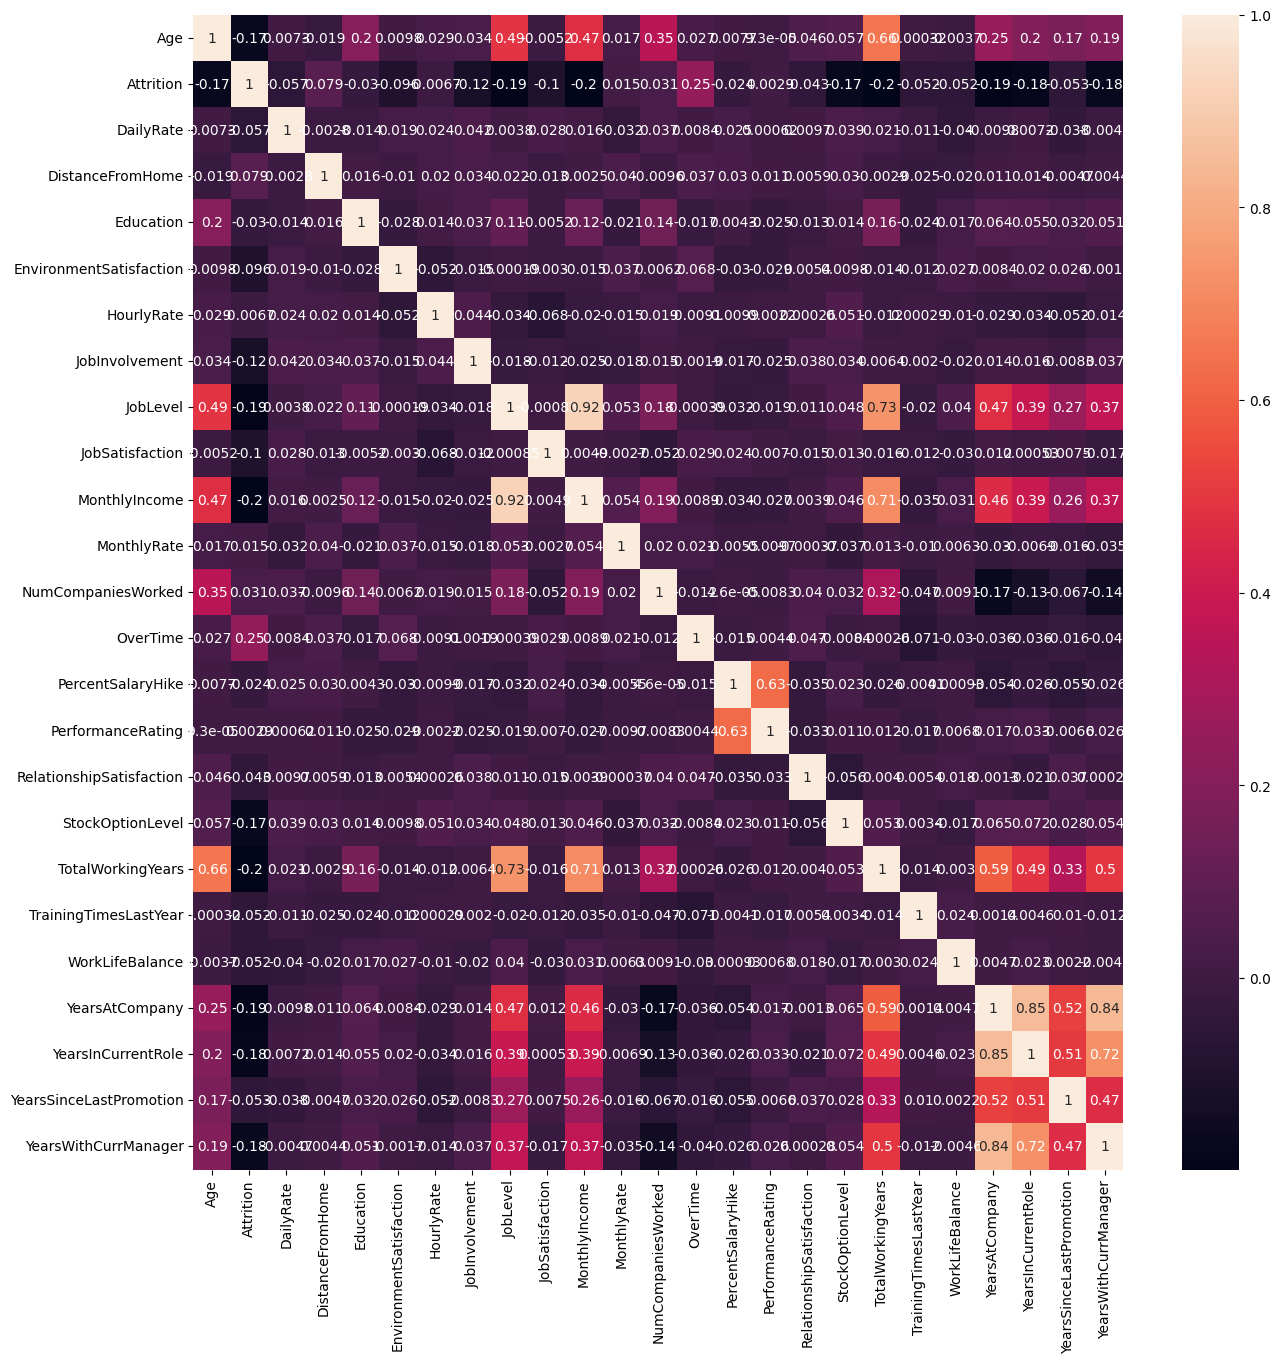

In [14]:
correlations = df.corr(numeric_only=True, method='spearman')
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, annot=True)

##  <span style = "color : lightgreen"> Attrition Status Based Upon Age</span>

(-0.5, 50.0)

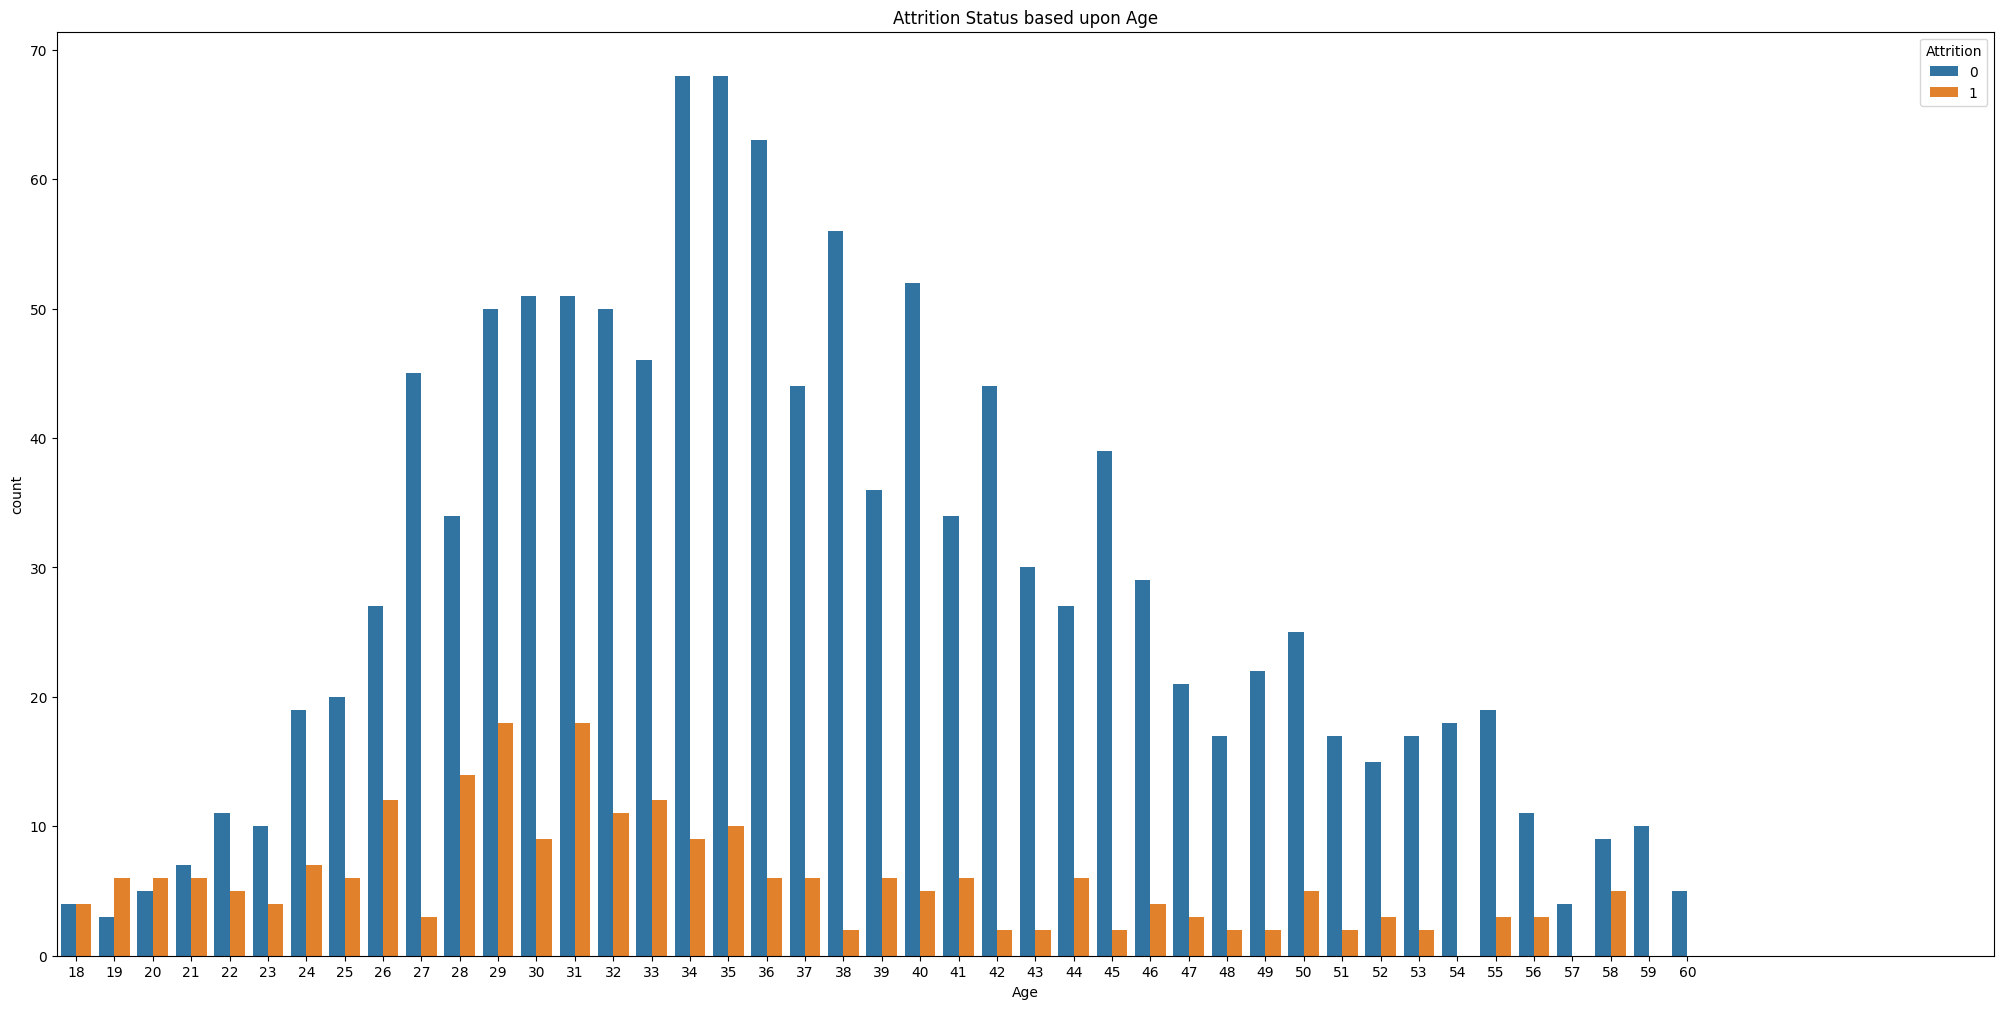

In [15]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = df)
plt.title('Attrition Status based upon Age')
plt.xlim(-0.5, 50)  

##  <span style = "color : lightgreen"> Attrition Status Based Upon Job role</span>

(0.0, 300.0)

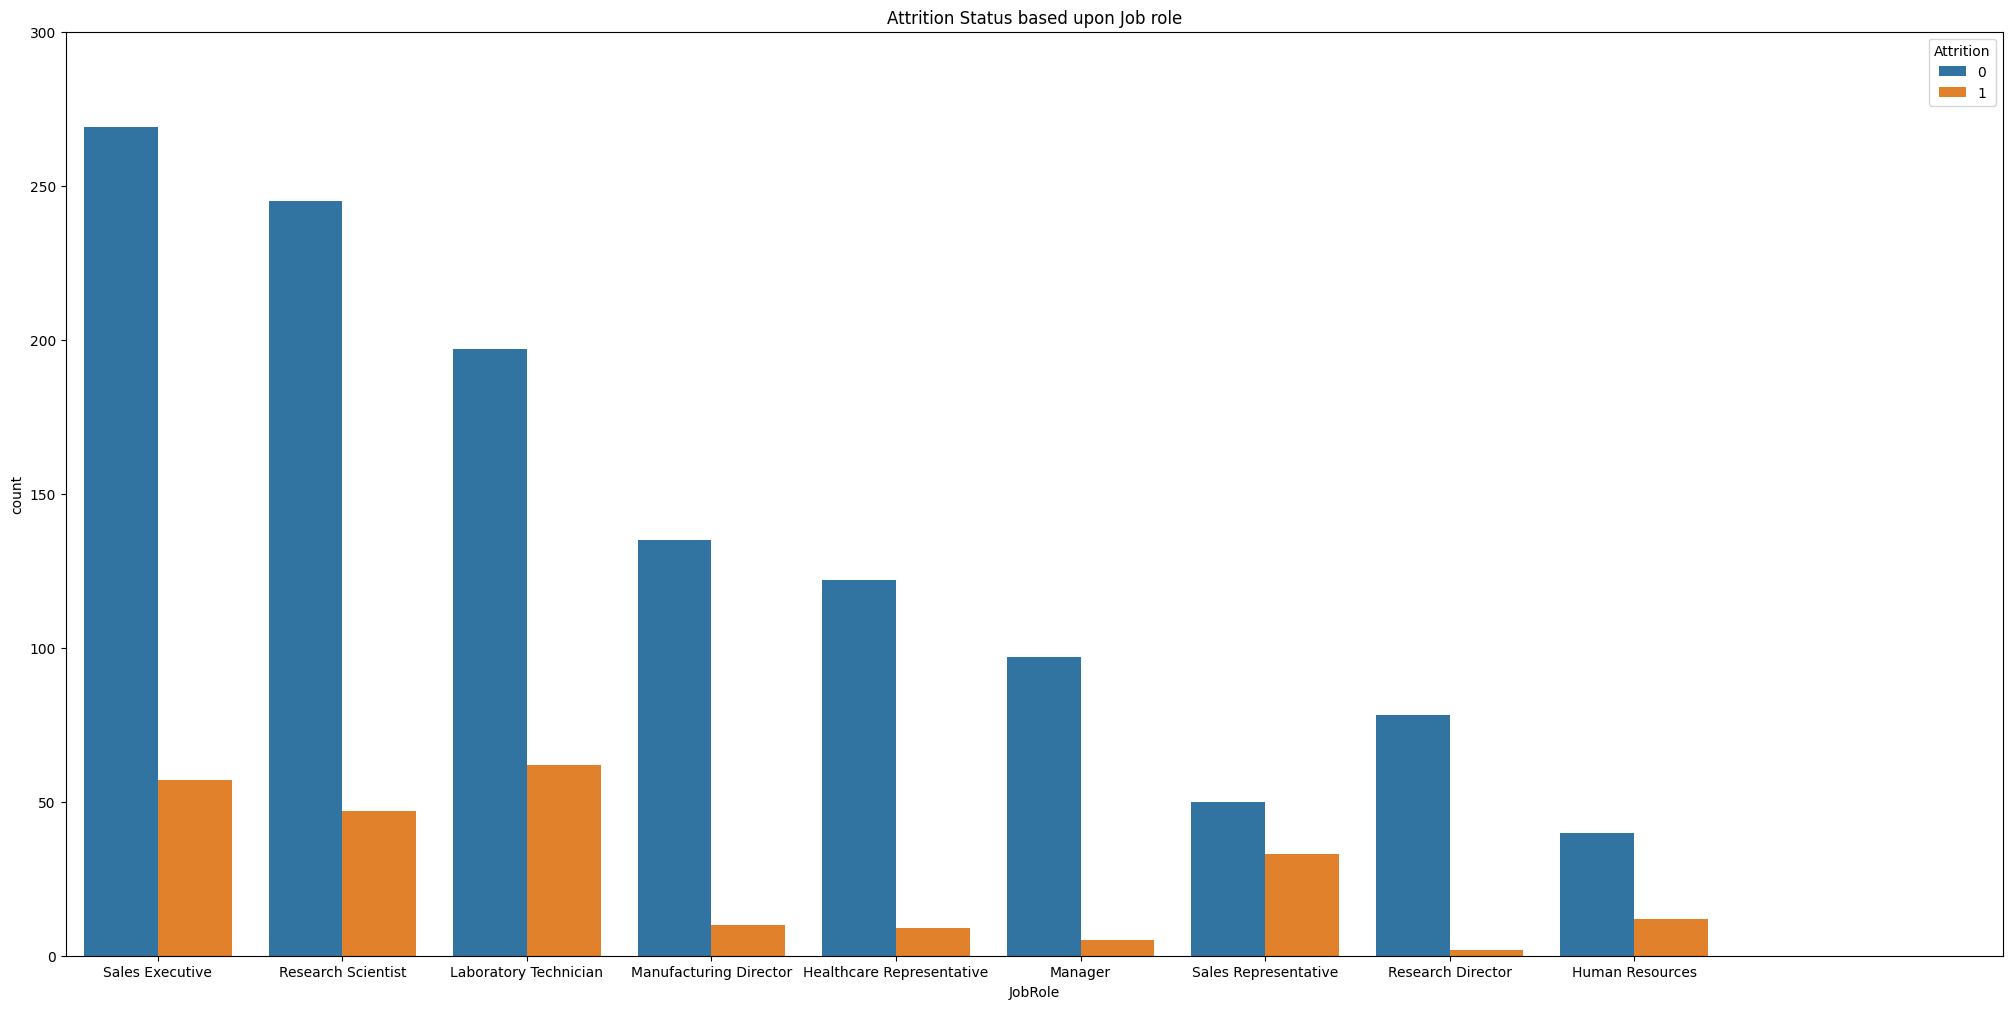

In [16]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df)
plt.title('Attrition Status based upon Job role')
plt.xlim(-0.5, 10)  
plt.ylim(0,300)  

##  <span style = "color : lightgreen"> Attrition Status Based Upon Marital Status</span>

(-0.5, 3.0)

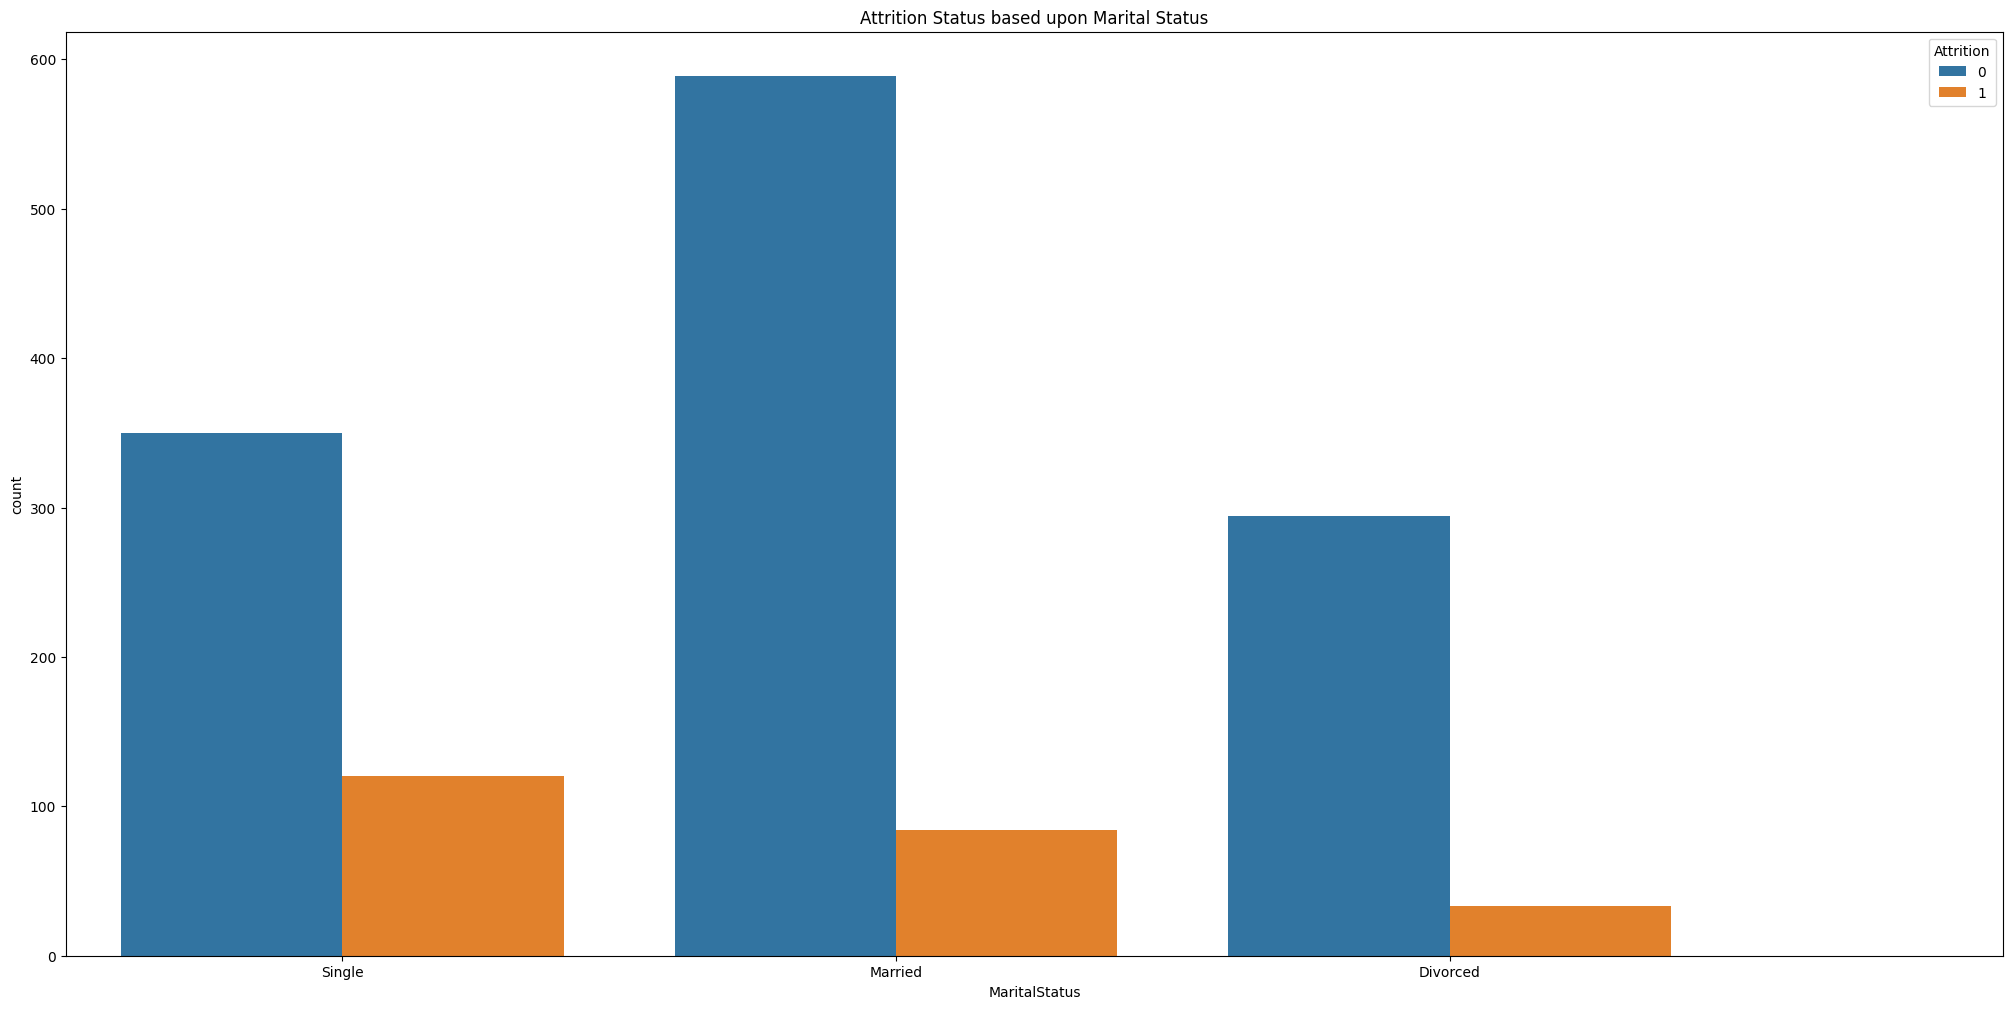

In [17]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)
plt.title('Attrition Status based upon Marital Status')
plt.xlim(-0.5, 3)  

##  <span style = "color : lightgreen"> Attrition Status Based Upon Job Involvement</span>

(0.0, 900.0)

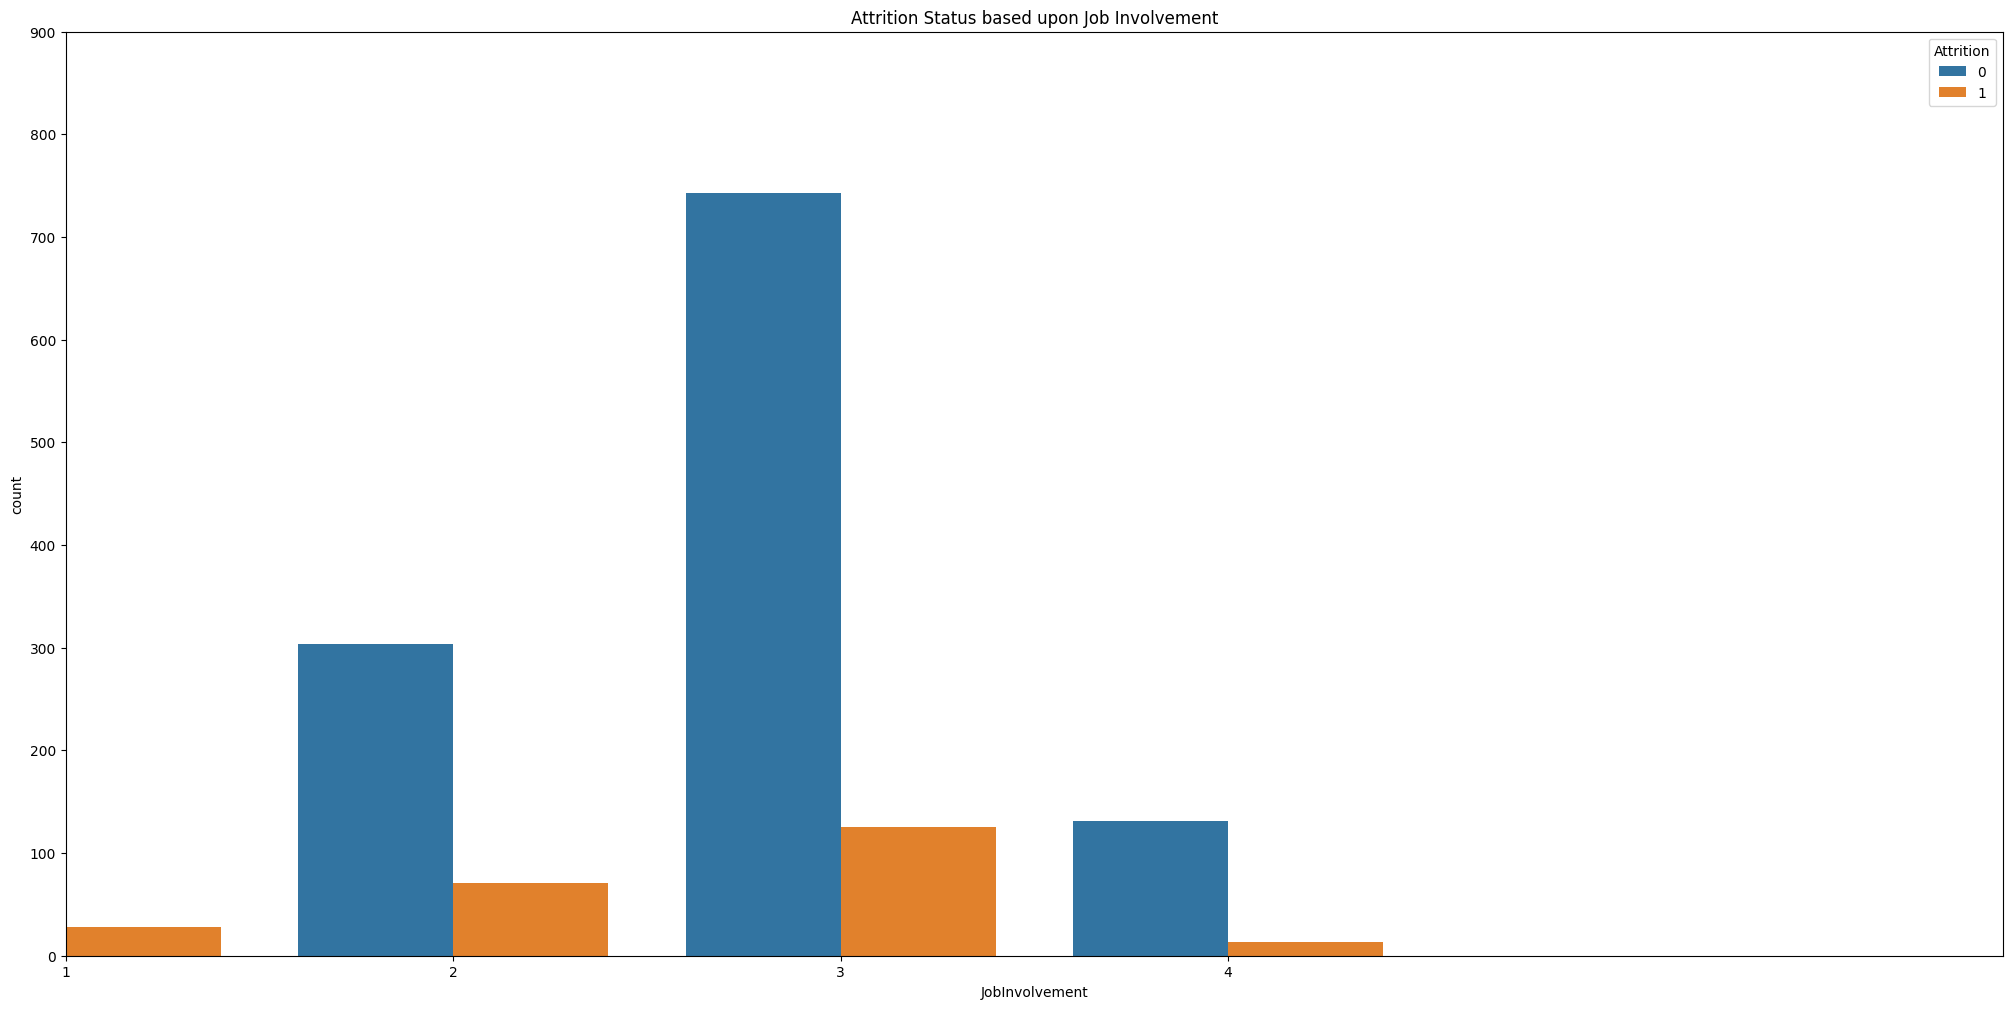

In [18]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df)
plt.title('Attrition Status based upon Job Involvement')
plt.xlim(0,5)  
plt.ylim(0, 900)  

##  <span style = "color : lightgreen"> Attrition Status Based Upon Job Level</span>

(0.0, 500.0)

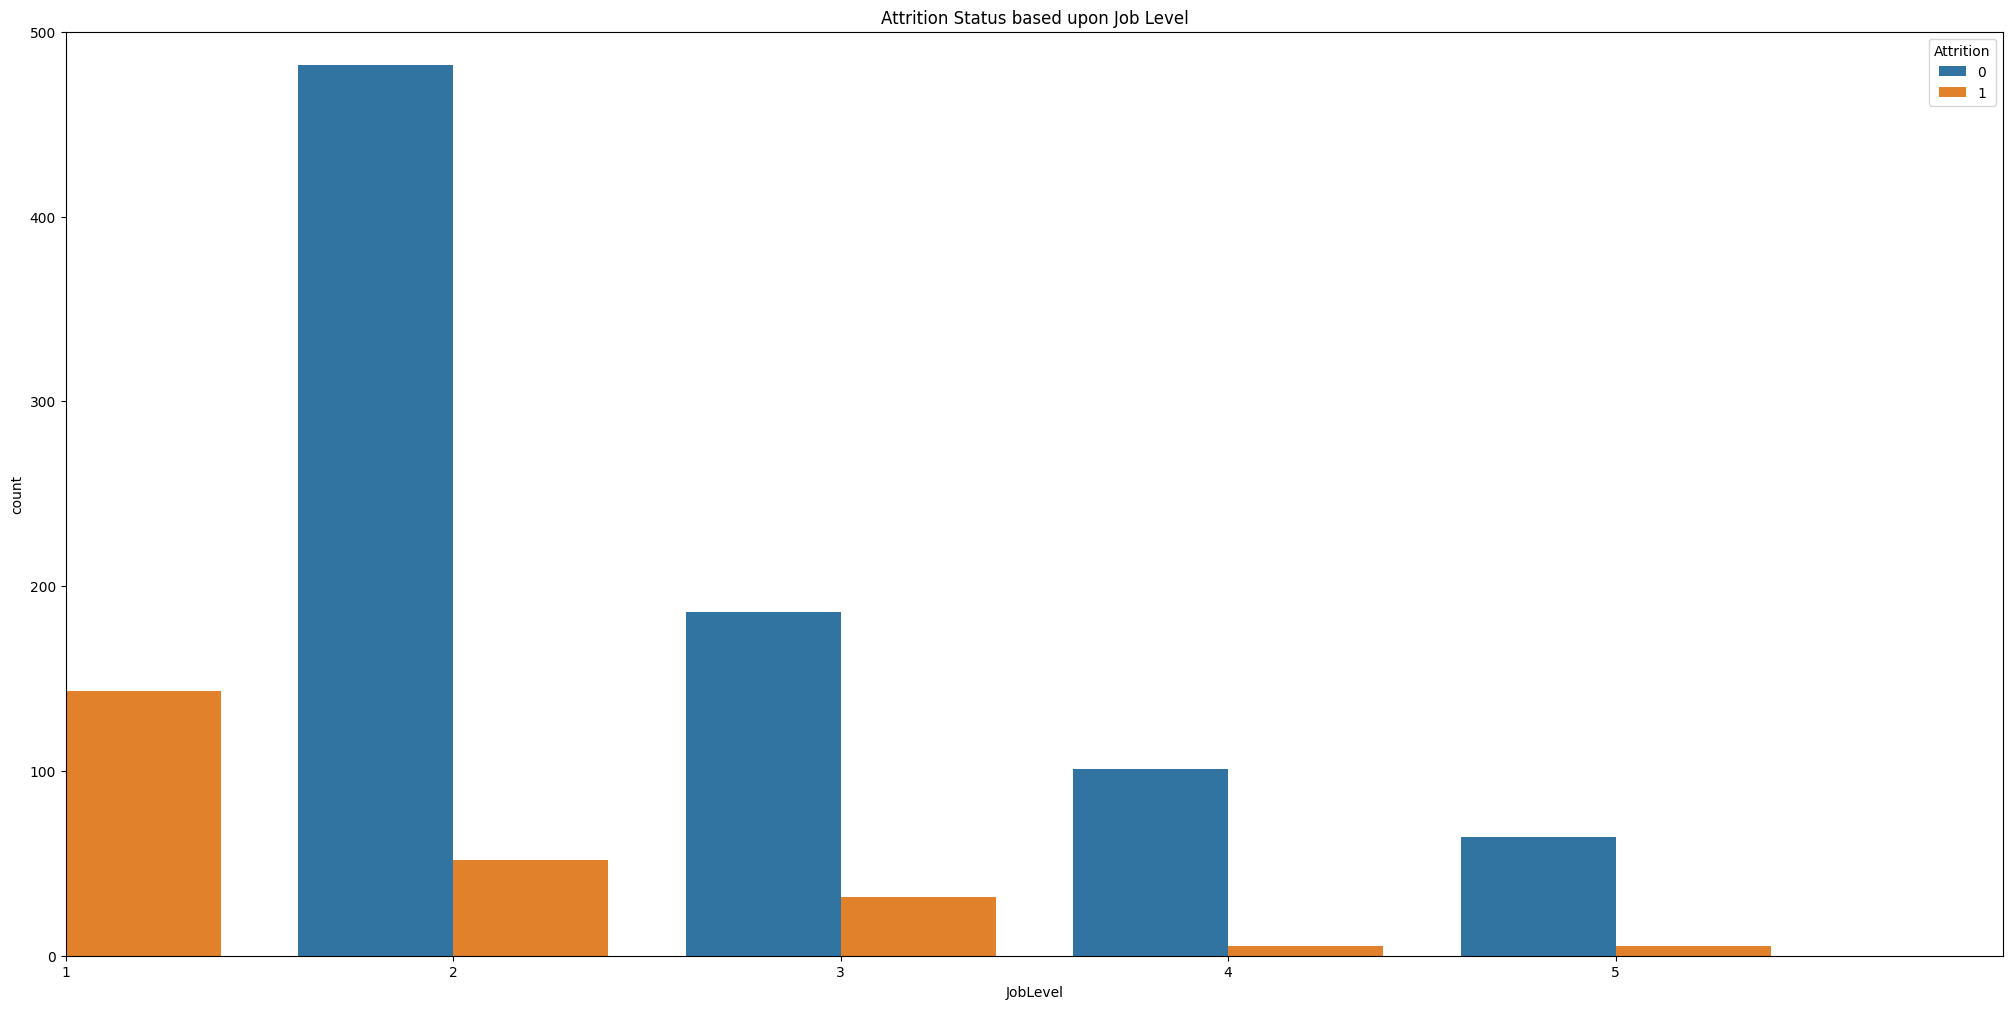

In [19]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df)
plt.title('Attrition Status based upon Job Level')
plt.xlim(0,5)  
plt.ylim(0, 500)  

##  <span style = "color : lightgreen">Gender vs Monthly Income</span>

<Axes: xlabel='Gender', ylabel='MonthlyIncome'>

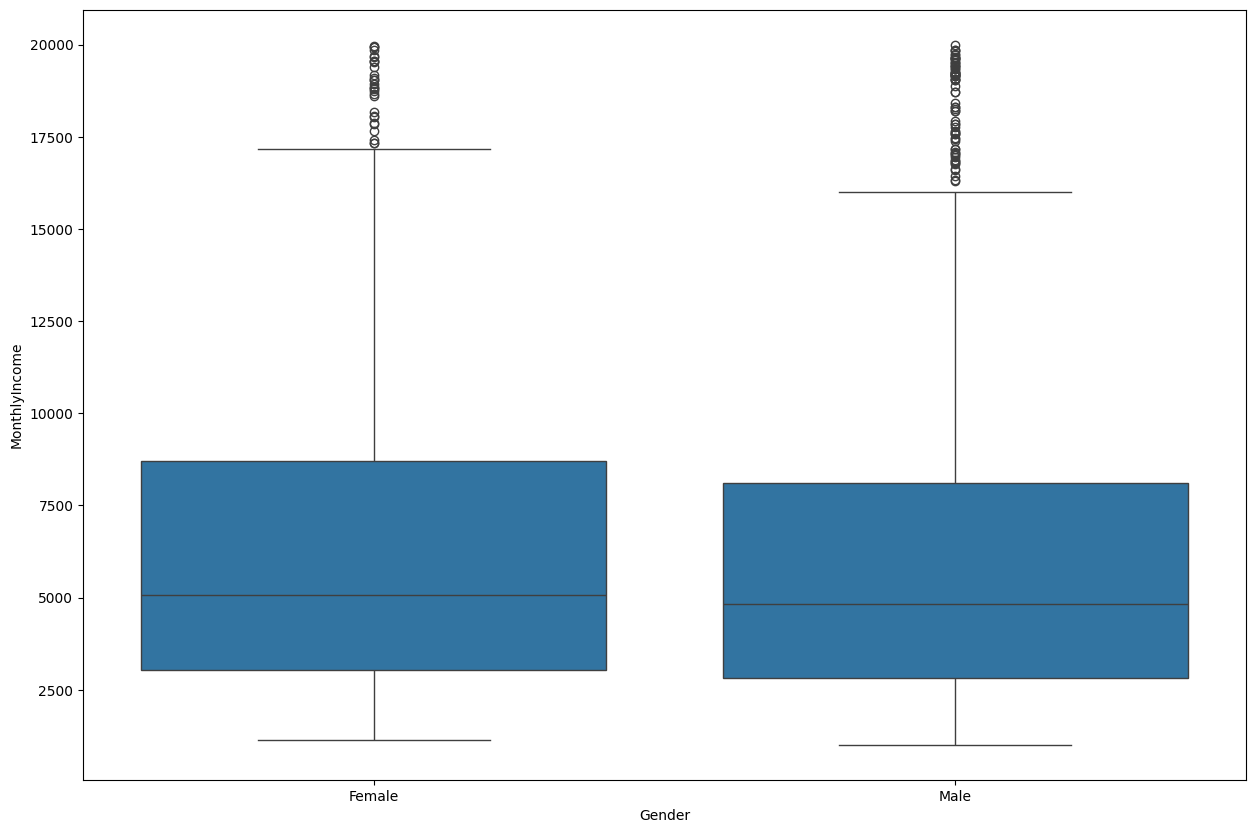

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Gender', y='MonthlyIncome', data=df)

##  <span style = "color : lightgreen">Monthly Income vs Job Role</span>

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

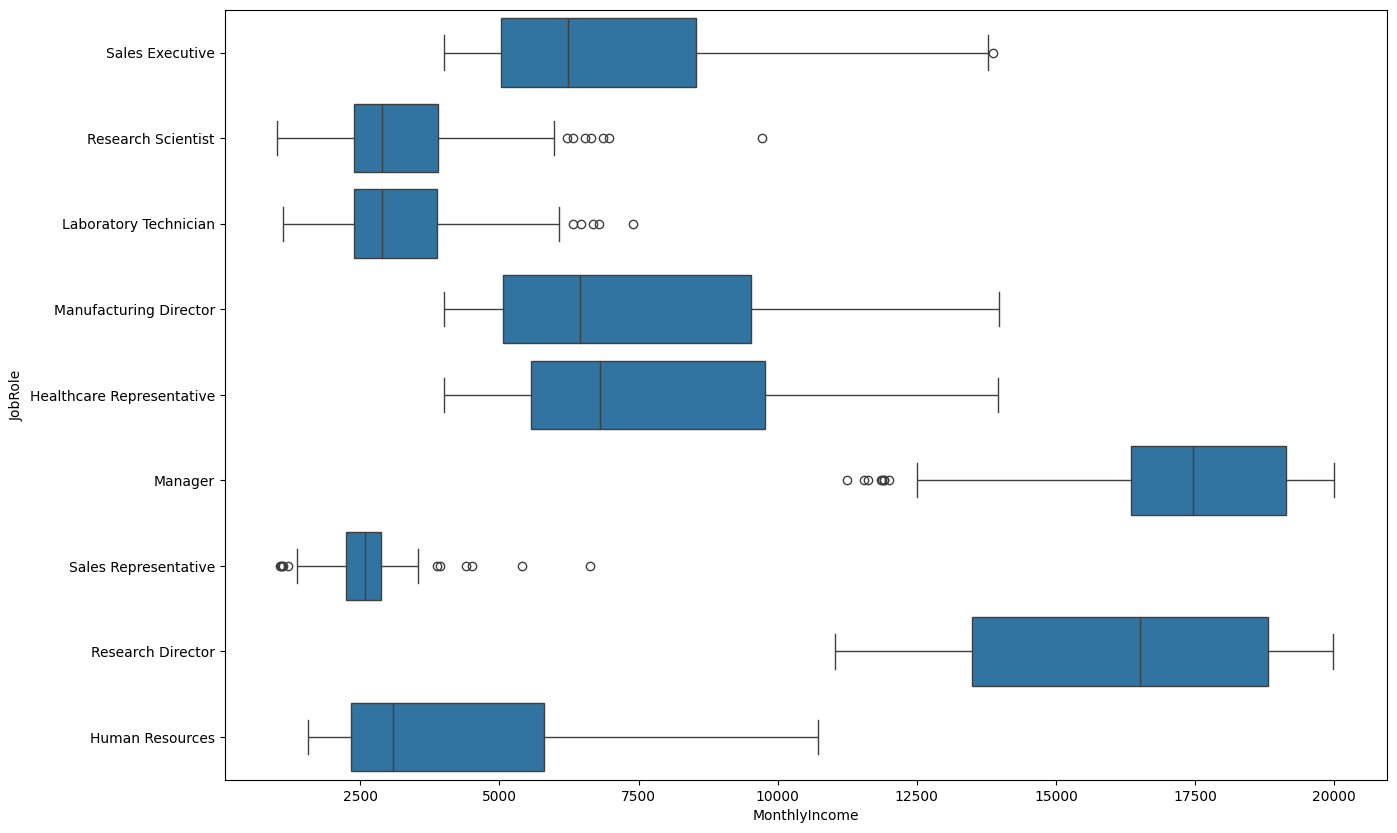

In [21]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=df)

#  <span style = "color : red"> Data Preparation</span>

##  <span style = "color : lightgreen"> Categorical Variables Encoding</span>

In [22]:
ohe = OneHotEncoder()
X_cat = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat = ohe.fit_transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
X_cat.columns = ohe.get_feature_names_out(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])

In [23]:
X_cat

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [24]:
X_num = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 
              'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 
              'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 
              'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

X_all = pd.concat([X_num, X_cat], axis=1)

In [25]:
X_cat.shape

(1470, 26)

In [26]:
X_all

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,613,6,1,4,42,2,3,1,9991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,155,4,3,2,87,4,2,2,6142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


##  <span style = "color : lightgreen"> Data Scaling</span>

In [27]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_all)

##  <span style = "color : lightgreen"> Train and Test datasets</span>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['Attrition'], test_size=0.25)

##  <span style = "color : lightgreen"> Some Classification models before balancing the class </span>

###  <span style = "color : white">Logistic Regresion </span>

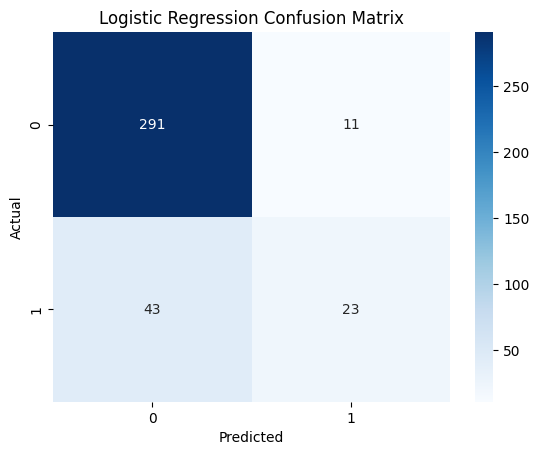

Accuracy: 0.8532608695652174
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       302
           1       0.68      0.35      0.46        66

    accuracy                           0.85       368
   macro avg       0.77      0.66      0.69       368
weighted avg       0.84      0.85      0.83       368



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.model_selection import GridSearchCV

lreg_model = LogisticRegression(random_state=42)
lreg_model.fit(X_train, y_train)

lreg_model.score(X_test, y_test)
y_pred = lreg_model.predict(X_test)
lreg_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(lreg_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

###  <span style = "color : white"> Decision Tree Classifier</span>

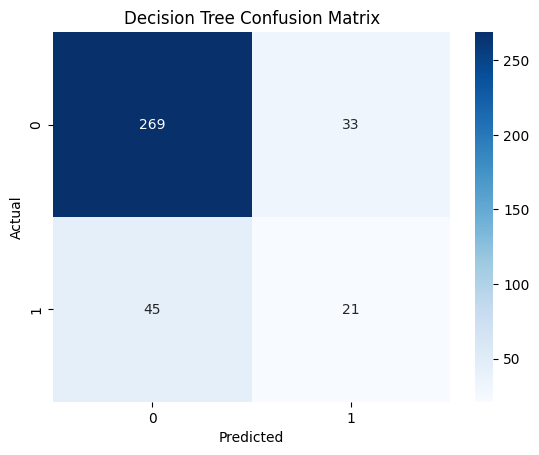

Accuracy: 0.7880434782608695
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       302
           1       0.39      0.32      0.35        66

    accuracy                           0.79       368
   macro avg       0.62      0.60      0.61       368
weighted avg       0.77      0.79      0.78       368



In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_model.score(X_test, y_test)
y_pred = dt_model.predict(X_test)
dt_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(dt_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

###  <span style = "color : white"> Random Forest Classifier</span>

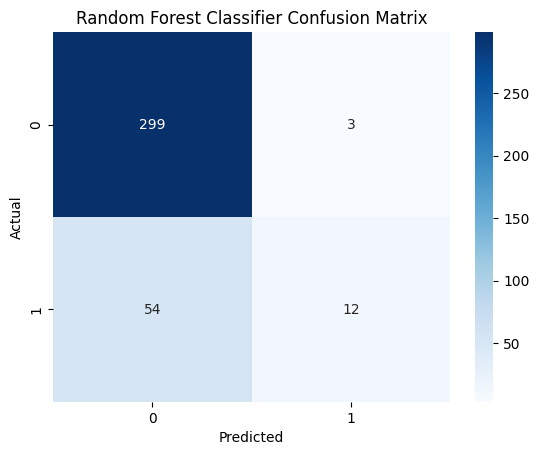

Accuracy: 0.845108695652174
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       302
           1       0.80      0.18      0.30        66

    accuracy                           0.85       368
   macro avg       0.82      0.59      0.60       368
weighted avg       0.84      0.85      0.80       368



In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train, y_train)

rfc_model.score(X_test, y_test)

y_pred = rfc_model.predict(X_test)
rfc_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(rfc_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

###  <span style = "color : white"> Gradient Boosting Classifier</span>

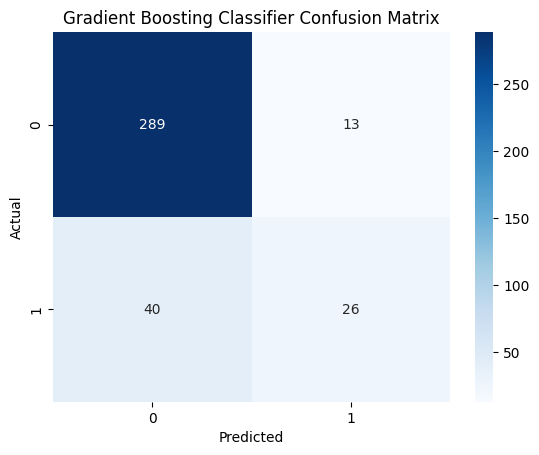

Accuracy: 0.8559782608695652
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       302
           1       0.67      0.39      0.50        66

    accuracy                           0.86       368
   macro avg       0.77      0.68      0.71       368
weighted avg       0.84      0.86      0.84       368



In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

gb_model.score(X_test, y_test)
y_pred = gb_model.predict(X_test)
gb_cnf = confusion_matrix(y_test, y_pred)

sns.heatmap(gb_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

###  <span style = "color : white"> Xgboost Classifier</span>

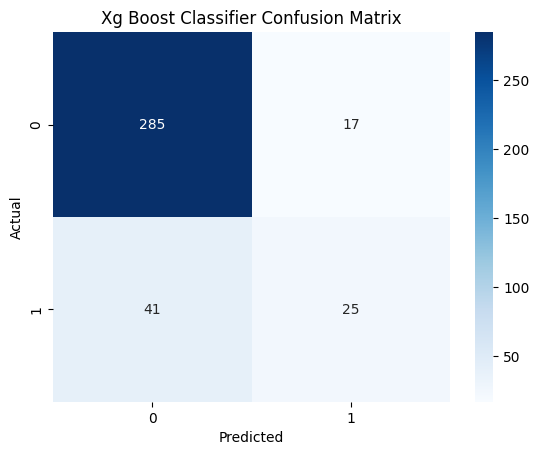

Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       302
           1       0.60      0.38      0.46        66

    accuracy                           0.84       368
   macro avg       0.73      0.66      0.69       368
weighted avg       0.82      0.84      0.83       368



In [34]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
Xgboost_cnf = confusion_matrix(y_test, y_pred)

sns.heatmap(Xgboost_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Xg Boost Classifier Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))


###  <span style = "color : white"> Extra Trees Classifier</span>

Test set accuracy: 0.8288043478260869


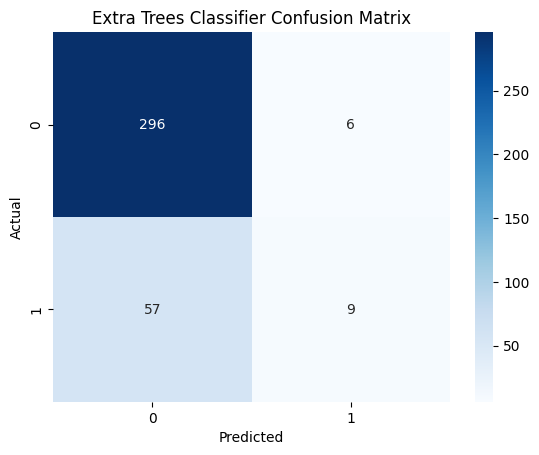

Accuracy: 0.8288043478260869
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       302
           1       0.60      0.14      0.22        66

    accuracy                           0.83       368
   macro avg       0.72      0.56      0.56       368
weighted avg       0.80      0.83      0.78       368



In [35]:
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt

etc_model = ExtraTreesClassifier(random_state=42)
etc_model.fit(X_train, y_train)

y_pred = etc_model.predict(X_test)


# Calculate and print the test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {test_accuracy}')

# Generate confusion matrix
etc_cnf = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(etc_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Extra Trees Classifier Confusion Matrix')
plt.show()

# Print accuracy and classification report
print(f'Accuracy: {test_accuracy}')
print(classification_report(y_test, y_pred))


###  <span style = "color : white"> Support Vector Machine</span>

Test set accuracy: 0.845108695652174


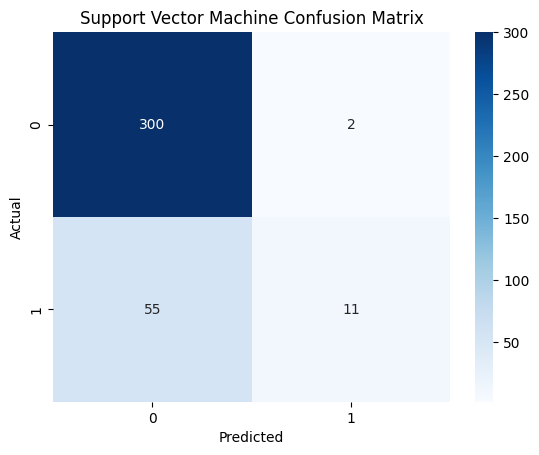

Accuracy: 0.845108695652174
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       302
           1       0.85      0.17      0.28        66

    accuracy                           0.85       368
   macro avg       0.85      0.58      0.60       368
weighted avg       0.85      0.85      0.80       368



In [36]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {test_accuracy}')

# Generate confusion matrix
svm_cnf = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(svm_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

# Print accuracy and classification report
print(f'Accuracy: {test_accuracy}')
print(classification_report(y_test, y_pred))


##  <span style = "color : lightgreen"> Class Balancing</span>

In [37]:
smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [38]:
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [39]:
smotetomek = SMOTETomek(random_state=0)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)


#  <span style = "color : orange"> Classification Models</span>

##  <span style = "color : white"> Logistic Regression</span>

##  <span style = "color : lightgreen"> Importing Libraries</span>

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.model_selection import GridSearchCV


##  <span style = "color : lightgreen"> Model Building</span>

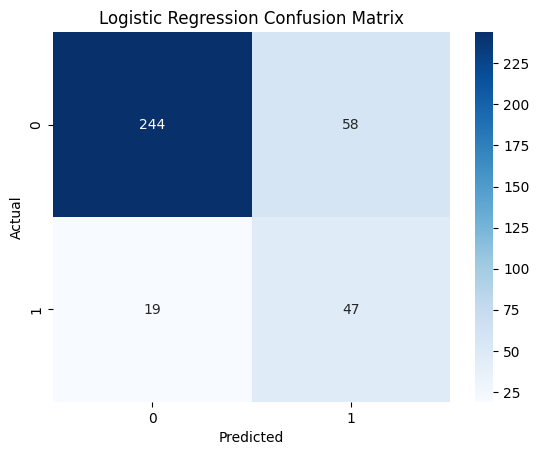

Accuracy: 0.7907608695652174
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       302
           1       0.45      0.71      0.55        66

    accuracy                           0.79       368
   macro avg       0.69      0.76      0.71       368
weighted avg       0.84      0.79      0.81       368



In [41]:
lreg_model = LogisticRegression(random_state=42)
lreg_model.fit(X_train_smote, y_train_smote)

lreg_model.score(X_test, y_test)
y_pred = lreg_model.predict(X_test)
lreg_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(lreg_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

##  <span style = "color : white">Hyperparameter Tuning for Logistic Regression</span>

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PC\AppData\Local\Prog

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Training set accuracy (after hyperparameter tuning): 0.8216970998925887
Test set accuracy (after hyperparameter tuning): 0.7853260869565217


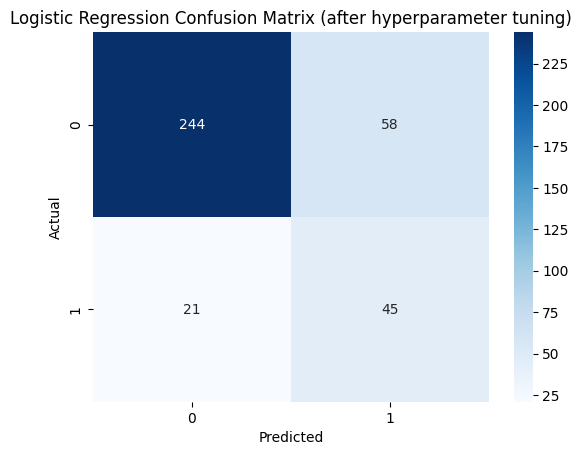

Accuracy (after hyperparameter tuning): 0.7853260869565217
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       302
           1       0.44      0.68      0.53        66

    accuracy                           0.79       368
   macro avg       0.68      0.74      0.70       368
weighted avg       0.83      0.79      0.80       368



In [42]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

lreg_model_tuned = LogisticRegression(max_iter=1000, random_state=42)

grid_search = GridSearchCV(estimator=lreg_model_tuned, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
# Train a new logistic regression model with the best hyperparameters
best_lreg_model = LogisticRegression(**best_params, max_iter=1000, random_state=42)
best_lreg_model.fit(X_train_smote, y_train_smote)

train_accuracy_tuned = best_lreg_model.score(X_train_smote, y_train_smote)
print("Training set accuracy (after hyperparameter tuning):", train_accuracy_tuned)

# Evaluate the model on the test set
test_accuracy_tuned = best_lreg_model.score(X_test, y_test)
print("Test set accuracy (after hyperparameter tuning):", test_accuracy_tuned)

# Make predictions and evaluate performance
y_pred_tuned = best_lreg_model.predict(X_test)
lreg_cnf_tuned = confusion_matrix(y_test, y_pred_tuned)

sns.heatmap(lreg_cnf_tuned, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix (after hyperparameter tuning)')
plt.show()

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Accuracy (after hyperparameter tuning):", accuracy_tuned)
print(classification_report(y_test, y_pred_tuned))


##  <span style = "color : white"> Decision Tree Classifier</span>

##  <span style = "color : lightgreen"> Importing Libraries</span>

In [43]:
from sklearn.tree import DecisionTreeClassifier

##  <span style = "color : lightgreen"> Model Building</span>

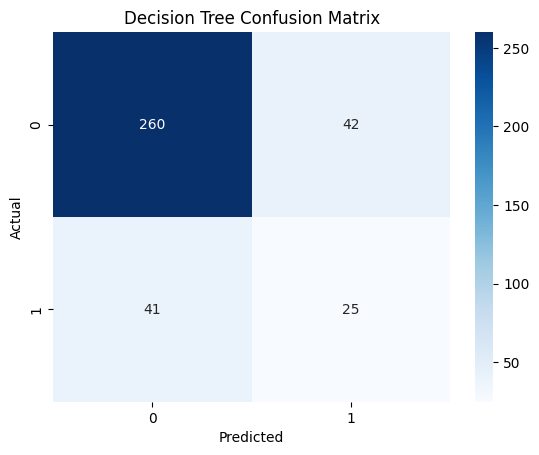

Accuracy: 0.7744565217391305
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       302
           1       0.37      0.38      0.38        66

    accuracy                           0.77       368
   macro avg       0.62      0.62      0.62       368
weighted avg       0.78      0.77      0.78       368



In [44]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_smote, y_train_smote)

dt_model.score(X_test, y_test)
y_pred = dt_model.predict(X_test)
dt_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(dt_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

##  <span style = "color : white">Hyperparameter Tuning for Decision Tree</span>

Cross-Validation Scores: [0.61702128 0.59574468 0.6344086  0.69892473 0.91397849 0.90322581
 0.91397849 0.95698925 0.95698925 0.93548387 0.89247312 0.95698925
 0.94623656 0.93548387 0.93548387 0.95698925 0.91397849 0.93548387
 0.95698925 0.94623656]
Mean Cross-Validation Accuracy: 0.8751544269045984
Training Set Accuracy: 0.9296455424274973


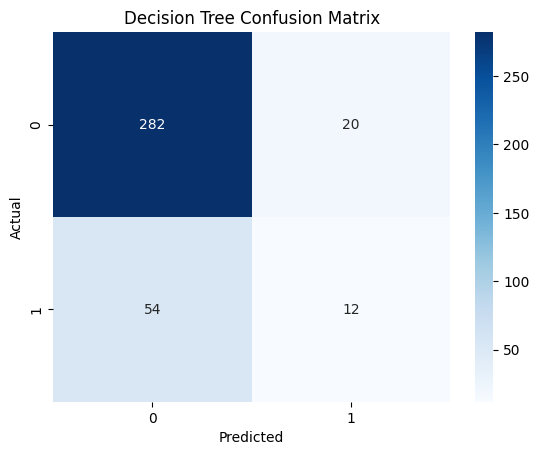

Test Set Accuracy: 0.7989130434782609
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       302
           1       0.38      0.18      0.24        66

    accuracy                           0.80       368
   macro avg       0.61      0.56      0.56       368
weighted avg       0.76      0.80      0.77       368



In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

# Initialize a Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Feature selection using Decision Tree feature importances
selector = SelectFromModel(dt_model, threshold=0.05)
selector.fit(X_train_smote, y_train_smote)

# Transform the dataset
X_train_selected = selector.transform(X_train_smote)
X_test_selected = selector.transform(X_test)

# Train the model on the selected features
dt_model.fit(X_train_selected, y_train_smote)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(dt_model, X_train_selected, y_train_smote, cv=20)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {cv_scores.mean()}')

# Predictions on the test set
y_pred = dt_model.predict(X_test_selected)

# Train the model on the selected features
dt_model.fit(X_train_selected, y_train_smote)

# Evaluate the model on the training set
train_accuracy = dt_model.score(X_train_selected, y_train_smote)
print(f'Training Set Accuracy: {train_accuracy}')


# Confusion matrix, classification report, etc.
dt_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(dt_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


##  <span style = "color : white"> Random Forest Classifier</span>

##  <span style = "color : lightgreen"> Importing Libraries</span>

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


##  <span style = "color : lightgreen"> Model Building</span>

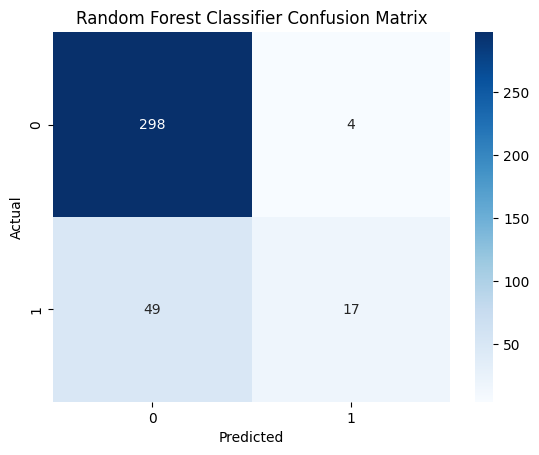

Accuracy: 0.8559782608695652
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       302
           1       0.81      0.26      0.39        66

    accuracy                           0.86       368
   macro avg       0.83      0.62      0.65       368
weighted avg       0.85      0.86      0.82       368



In [47]:
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train_smote, y_train_smote)

rfc_model.score(X_test, y_test)

y_pred = rfc_model.predict(X_test)
rfc_cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(rfc_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

##  <span style = "color : white">Hyperparameter Tuning for Random Forest</span>

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
972 fits failed out of a total of 2916.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 

Best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best mean accuracy: 0.9328943950963587
Training set accuracy: 1.0
Test set accuracy: 0.8559782608695652


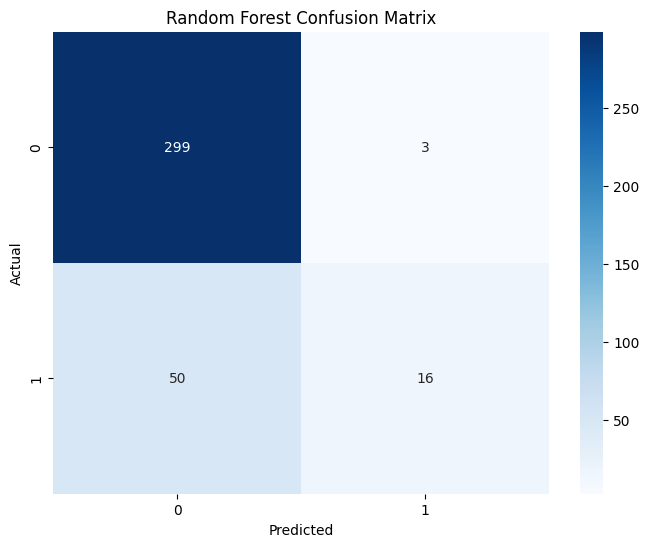

In [48]:
params = {
    "n_estimators": [100, 200, 300],  # Number of trees in the forest
    "criterion": ["gini", "entropy"],  # Criterion for splitting
    "max_depth": [None, 10, 20],  # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],  # Minimum number of samples required to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum number of samples required at each leaf node
    "max_features": ["auto", "sqrt", "log2"],  # Number of features to consider when looking for the best split
    "bootstrap": [True, False]  # Whether bootstrap samples are used when building trees
}
rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params, scoring="accuracy", cv=3, n_jobs=-1, verbose=1)
rf_cv.fit(X_train_smote, y_train_smote)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")
best_score = rf_cv.best_score_
print(f"Best mean accuracy: {best_score}")
best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
best_rf_clf.fit(X_train_smote, y_train_smote)
# Evaluate the model on the training set
train_accuracy = best_rf_clf.score(X_train_smote, y_train_smote)
print(f"Training set accuracy: {train_accuracy}")
test_accuracy = best_rf_clf.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy}")
# Generate confusion matrix
y_pred_rf = best_rf_clf.predict(X_test)
rf_cnf_matrix = confusion_matrix(y_test, y_pred_rf)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()



##  <span style = "color : white"> Gradient Boosting Classifier</span>

##  <span style = "color : lightgreen"> Importing Libraries</span>

In [49]:
from sklearn.ensemble import  GradientBoostingClassifier

##  <span style = "color : lightgreen"> Model Building</span>

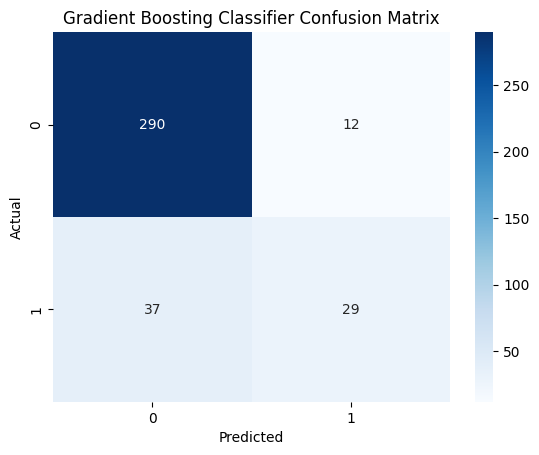

Accuracy: 0.8668478260869565
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       302
           1       0.71      0.44      0.54        66

    accuracy                           0.87       368
   macro avg       0.80      0.70      0.73       368
weighted avg       0.85      0.87      0.85       368



In [50]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_smote, y_train_smote)

gb_model.score(X_test, y_test)
y_pred = gb_model.predict(X_test)
gb_cnf = confusion_matrix(y_test, y_pred)

sns.heatmap(gb_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

##  <span style = "color : white">Hyperparameter Tuning for Gradient Boosting</span>

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best mean accuracy: 0.9135620660398595
Training set accuracy: 1.0
Test set accuracy: 0.8804347826086957


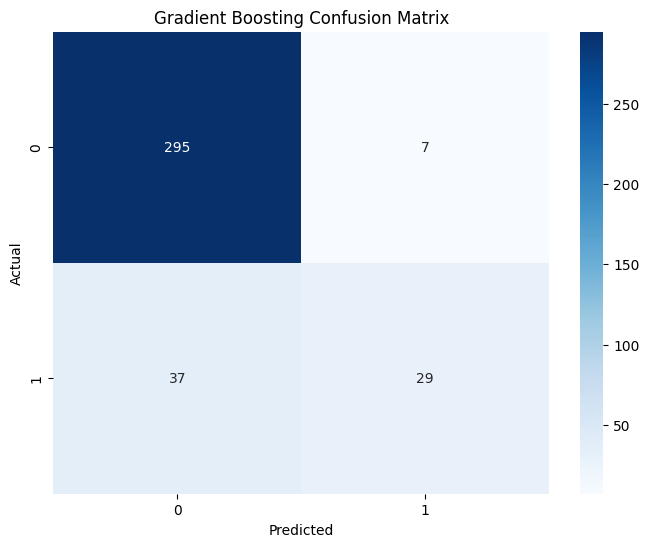

In [51]:
params = {
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}
# Instantiate Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Perform GridSearchCV
gb_cv = GridSearchCV(gb_clf, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
gb_cv.fit(X_train_smote, y_train_smote)
best_params = gb_cv.best_params_
print(f"Best parameters: {best_params}")
best_score = gb_cv.best_score_
print(f"Best mean accuracy: {best_score}")
# Train model with best parameters
best_gb_clf = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_clf.fit(X_train_smote, y_train_smote)
# Evaluate the model on the training set
train_accuracy = best_gb_clf.score(X_train_smote, y_train_smote)
print(f"Training set accuracy: {train_accuracy}")
# Evaluate model on test set
test_accuracy = best_gb_clf.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy}")
# Generate confusion matrix
y_pred_gb = best_gb_clf.predict(X_test)
gb_cnf_matrix = confusion_matrix(y_test, y_pred_gb)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gb_cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()


##  <span style = "color : white"> Xg Boost Classifier</span>

##  <span style = "color : lightgreen">Importing Libraries</span>

In [52]:
import xgboost as xgb

##  <span style = "color : lightgreen">Model Building</span>

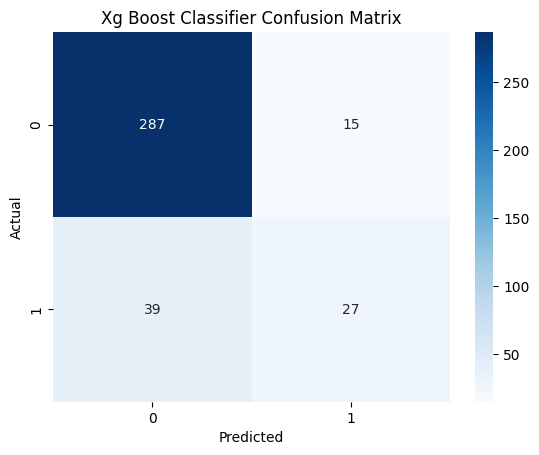

Accuracy: 0.8532608695652174
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       302
           1       0.64      0.41      0.50        66

    accuracy                           0.85       368
   macro avg       0.76      0.68      0.71       368
weighted avg       0.84      0.85      0.84       368



In [53]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_smote, y_train_smote)
y_pred = xgb_classifier.predict(X_test)
Xgboost_cnf = confusion_matrix(y_test, y_pred)

sns.heatmap(Xgboost_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Xg Boost Classifier Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))


##  <span style = "color : white">Hyperparameter Tuning for Xg Boost Classifier </span>

Accuracy (XGBoost): 0.8614130434782609
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       302
           1       0.70      0.39      0.50        66

    accuracy                           0.86       368
   macro avg       0.79      0.68      0.71       368
weighted avg       0.85      0.86      0.85       368



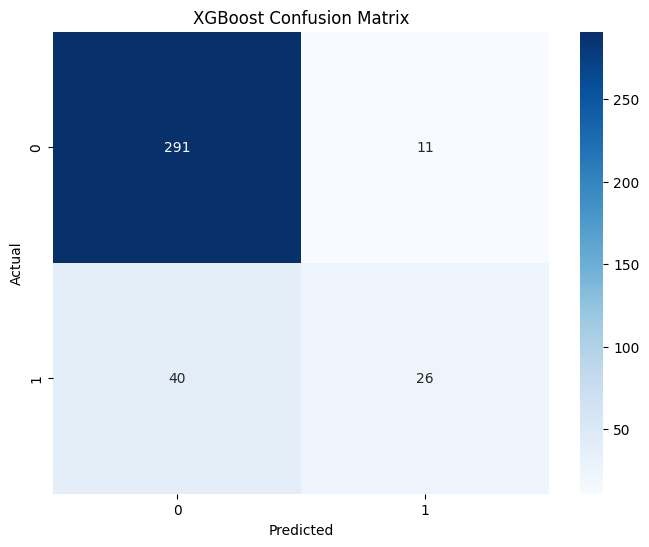

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# Define the XGBoost classifier
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)

# Define the hyperparameters distribution to sample from
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Perform randomized search with stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=skf, scoring='accuracy', random_state=42)
random_search_xgb.fit(X_train, y_train)

# Get the best model from the randomized search
best_model_xgb = random_search_xgb.best_estimator_

# Evaluate the best model on the test set
y_pred_xgb = best_model_xgb.predict(X_test)

# Calculate accuracy and print the classification report
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy (XGBoost): {accuracy_xgb}')
print(classification_report(y_test, y_pred_xgb))

# Generate confusion matrix
xgb_cnf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()


##  <span style = "color : white"> Extra Trees Classifier</span>

Test set accuracy: 0.8885869565217391


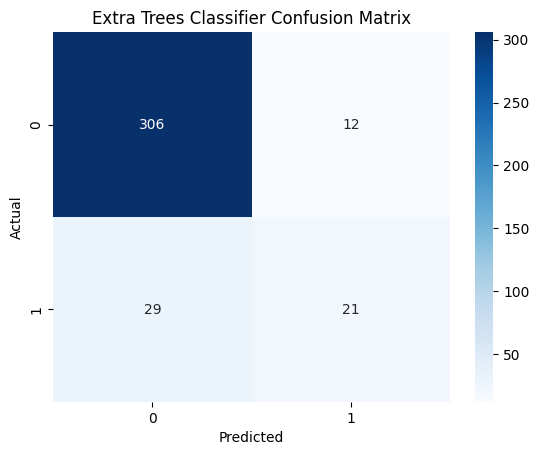

Accuracy: 0.8885869565217391
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       318
           1       0.64      0.42      0.51        50

    accuracy                           0.89       368
   macro avg       0.77      0.69      0.72       368
weighted avg       0.88      0.89      0.88       368



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

etc_model = ExtraTreesClassifier(random_state=42)
etc_model.fit(X_train_smote, y_train_smote)

y_pred = etc_model.predict(X_test)

# Calculate and print the test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {test_accuracy}')

# Generate confusion matrix
etc_cnf = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(etc_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Extra Trees Classifier Confusion Matrix')
plt.show()

# Print accuracy and classification report
print(f'Accuracy: {test_accuracy}')
print(classification_report(y_test, y_pred))


##  <span style = "color : white">Hyperparameter Tuning for Extra Trees Classifier </span>

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
828 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
674 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 

Best parameters: {'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Test set accuracy: 0.8831521739130435


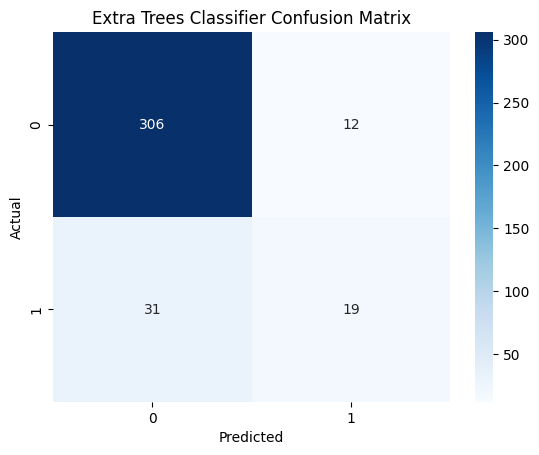

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       318
           1       0.61      0.38      0.47        50

    accuracy                           0.88       368
   macro avg       0.76      0.67      0.70       368
weighted avg       0.87      0.88      0.87       368



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
# Define the Extra Trees Classifier
etc_model = ExtraTreesClassifier(random_state=42)

# Define the hyperparameter grid with an expanded search space
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV with more iterations
etc_random_cv = RandomizedSearchCV(etc_model, param_distributions=param_grid, n_iter=500,
                                   scoring='accuracy', cv=3, n_jobs=-1, verbose=1, random_state=42)
etc_random_cv.fit(X_train_smote, y_train_smote)

# Get the best parameters and score
best_params = etc_random_cv.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_etc_model = ExtraTreesClassifier(**best_params, random_state=42)
best_etc_model.fit(X_train_smote, y_train_smote)

# Evaluate the model on the test set
y_pred = best_etc_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy}")

# Generate confusion matrix
etc_cnf = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(etc_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Extra Trees Classifier Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


##  <span style = "color : white"> Support Vector Machine</span>

Test set accuracy: 0.8396739130434783


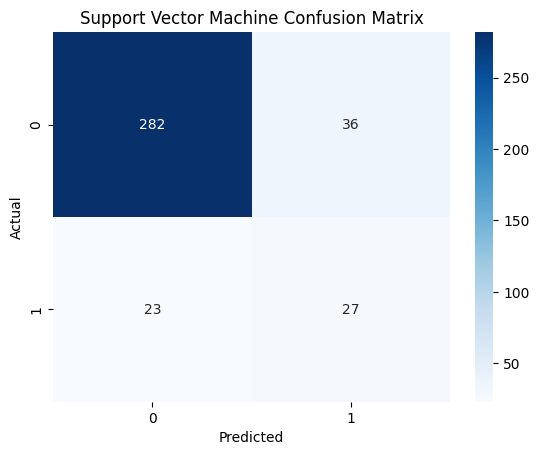

Accuracy: 0.8396739130434783
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       318
           1       0.43      0.54      0.48        50

    accuracy                           0.84       368
   macro avg       0.68      0.71      0.69       368
weighted avg       0.86      0.84      0.85       368



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate Support Vector Machine classifier
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {test_accuracy}')

# Generate confusion matrix
svm_cnf = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(svm_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

# Print accuracy and classification report
print(f'Accuracy: {test_accuracy}')
print(classification_report(y_test, y_pred))


##  <span style = "color : white">Hyperparameter Tuning for Support Vector Machine </span>

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Best parameters: {'shrinking': False, 'probability': True, 'kernel': 'rbf', 'gamma': 1, 'degree': 3, 'coef0': 0.5, 'C': 1000}
Test set accuracy: 0.8614130434782609


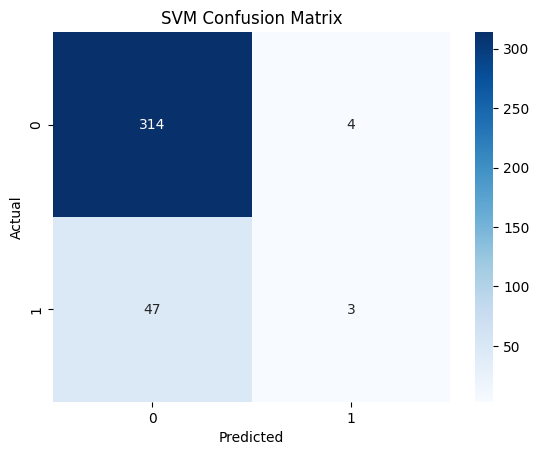

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       318
           1       0.43      0.06      0.11        50

    accuracy                           0.86       368
   macro avg       0.65      0.52      0.52       368
weighted avg       0.81      0.86      0.81       368



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the SVM classifier
svm_model = SVC()

# Define the hyperparameter grid with a larger search space
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 0.1, 0.5, 1.0],
    'shrinking': [True, False],
    'probability': [True, False],
}

# Perform RandomizedSearchCV with more iterations
svm_random_cv = RandomizedSearchCV(svm_model, param_distributions=param_grid, n_iter=500,
                                   scoring='accuracy', cv=3, n_jobs=-1, verbose=1, random_state=42)
svm_random_cv.fit(X_train_smote, y_train_smote)

# Get the best parameters and score
best_params = svm_random_cv.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train_smote, y_train_smote)

# Evaluate the model on the test set
y_pred = best_svm_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy}")

# Generate confusion matrix
svm_cnf = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(svm_cnf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))